<a href="https://colab.research.google.com/github/ayushipradhan30/python_solutions/blob/main/13-Logistic-Regression/02-Logistic%20Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='https://github.com/ayushipradhan30/Python/blob/main/Pierian_Data_Logo.png?raw=1' /></a>
___
# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ayushipradhan30/Python/refs/heads/main/13-Logistic-Regression/advertising.csv')

**Check the head of ad_data**

In [3]:
df.head(0)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


** Use info and describe() on ad_data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

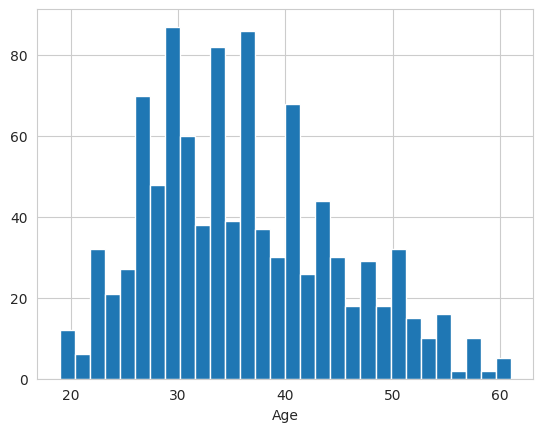

In [7]:
sns.set_style('whitegrid')
df['Age'].hist(bins = 30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

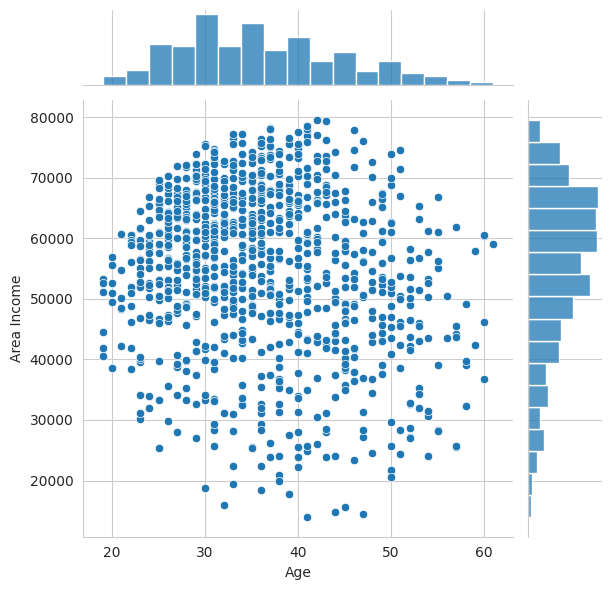

In [8]:
sns.jointplot(x = 'Age', y = 'Area Income', data = df)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

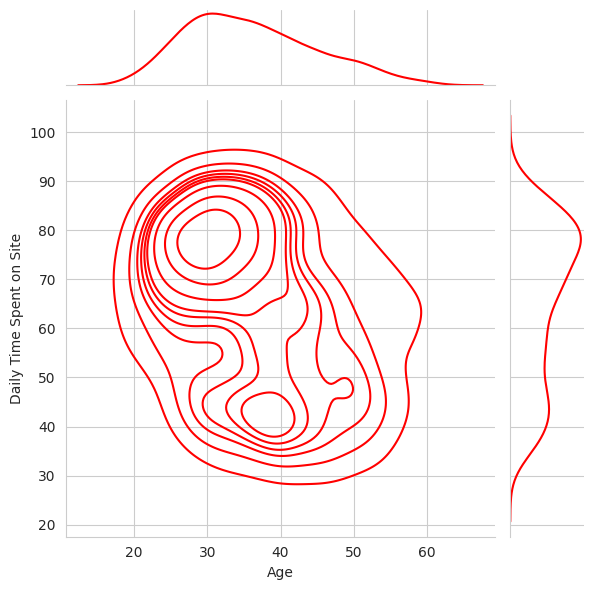

In [12]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = df, kind = 'kde', color='red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

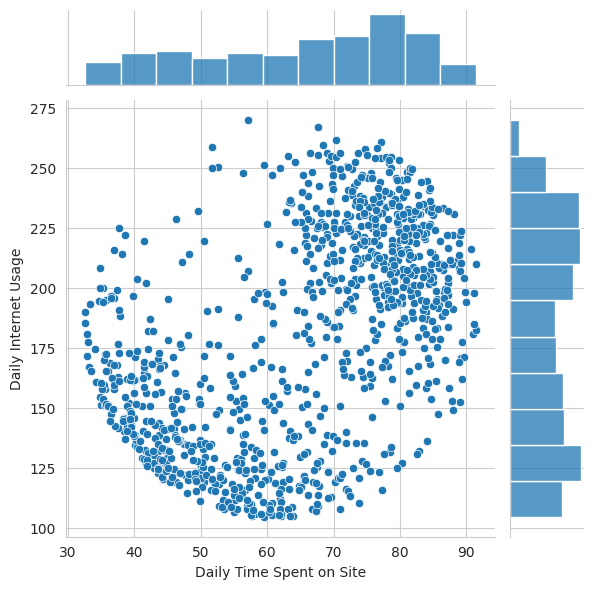

In [13]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = df)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

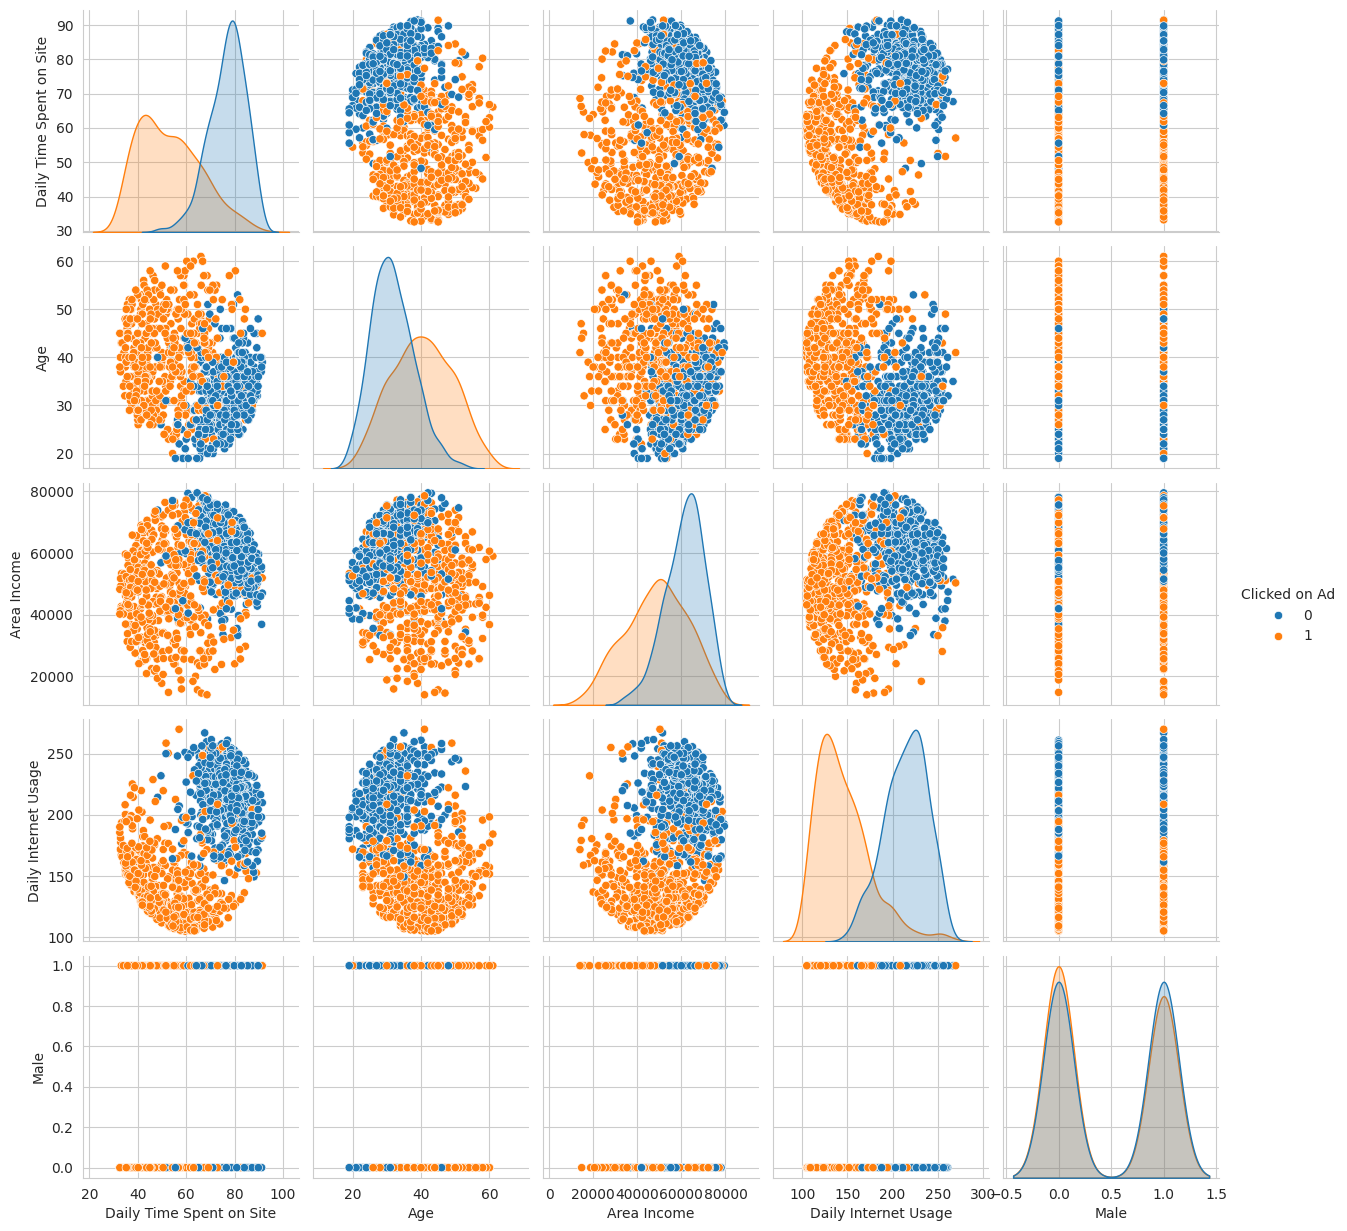

In [15]:
sns.pairplot(df, hue = 'Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [17]:
x = df[['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [20]:
y_pred = lr.predict(x_test)

** Create a classification report for the model.**

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.95      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



## Great Job!